In [1]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# !pip install easyocr

In [3]:
im_1_path = '../img.jpg'

In [4]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [5]:
result = recognize_text(im_1_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
result

[[[[206, 32], [424, 32], [424, 80], [206, 80]],
  'PAKISTAN',
  0.9279841634319131],
 [[[437, 47], [692, 47], [692, 80], [437, 80]],
  'National Identity Card',
  0.8336069655942129],
 [[[213, 85], [417, 85], [417, 101], [213, 101]],
  'ISLAMIG REPUBUC OF PAKISTAN',
  0.4984029695077603],
 [[[247, 107], [303, 107], [303, 127], [247, 127]],
  'Name',
  0.9940229654312134],
 [[[242, 212], [364, 212], [364, 236], [242, 236]],
  'Father Nama',
  0.7726937023415203],
 [[[253, 231], [415, 231], [415, 267], [253, 267]],
  'Abdul Ghaffar',
  0.9310185226292649],
 [[[241, 321], [311, 321], [311, 341], [241, 341]],
  'Gender',
  0.8534690024403669],
 [[[323, 318], [424, 318], [424, 346], [323, 346]],
  'Country ٥f',
  0.9216667620808768],
 [[[250, 346], [274, 346], [274, 374], [250, 374]], 'M', 0.9882338115164799],
 [[[330, 345], [425, 345], [425, 381], [330, 381]],
  'Pakistan',
  0.821069008785526],
 [[[235, 387], [392, 387], [392, 414], [235, 414]],
  'Identity Number',
  0.7559338669701585],

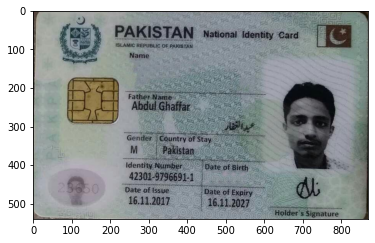

In [7]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [8]:
import json

In [9]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)
    dic_data={}
    lis_data=[]

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            dic={} 
            dic['text']=text
            lis_data.append(dic)
            (top_left, top_right, bottom_right, bottom_left) = bbox
            print(top_left, top_right, bottom_right, bottom_left)
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            dic['pos']=top_left,bottom_right
            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
    dic_data['Data']=lis_data
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_card.jpg', bbox_inches='tight')
    print(dic_data)
    f=json.dumps(dic_data,indent=4)
    with open('./output/my_data.json','w') as fil:
      fil.write(f)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: PAKISTAN (Probability: 0.93)
[206, 32] [424, 32] [424, 80] [206, 80]
Detected text: National Identity Card (Probability: 0.83)
[437, 47] [692, 47] [692, 80] [437, 80]
Detected text: Name (Probability: 0.99)
[247, 107] [303, 107] [303, 127] [247, 127]
Detected text: Father Nama (Probability: 0.77)
[242, 212] [364, 212] [364, 236] [242, 236]
Detected text: Abdul Ghaffar (Probability: 0.93)
[253, 231] [415, 231] [415, 267] [253, 267]
Detected text: Gender (Probability: 0.85)
[241, 321] [311, 321] [311, 341] [241, 341]
Detected text: Country ٥f (Probability: 0.92)
[323, 318] [424, 318] [424, 346] [323, 346]
Detected text: M (Probability: 0.99)
[250, 346] [274, 346] [274, 374] [250, 374]
Detected text: Pakistan (Probability: 0.82)
[330, 345] [425, 345] [425, 381] [330, 381]
Detected text: Identity Number (Probability: 0.76)
[235, 387] [392, 387] [392, 414] [235, 414]
Detected text: Date of Birth (Probability: 0.64)
[442, 393] [563, 393] [563, 420] [442, 420]
Detected text: 42

<Figure size 432x288 with 0 Axes>

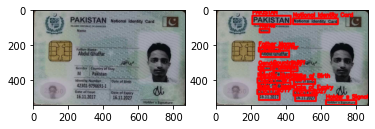

In [10]:
overlay_ocr_text(im_1_path, 'idcard_info')